# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 10.1

The goal of lesson 10 is to *adapt* the Genetic Algorithm code written in the previous lesson to have a C++ code to solve the TSP with a Simulated Annealing (SA) algorithm.
The program exploits the previously implemented genetic mutation (randomly drawn) as proposed move for the algorithm.

Like in the previous lesson I applied my code to optimize the path among 32 cities randomly placed on a circumference and 32 cities randomly placed inside a square. 
The two generated world are the same of the `NSL-10`. 
In this way I can compare the results obtained via Genetic Algoritmh and Simulated Anneling.

Once I obtained the data I produced a picture the length of the optimized path as a function of the iterations of the SA algorithm and a picture of such path for both the circular and the square dispositions of the cities. 
Icompared both graphs with those obtained with the Genetic Algorithm.

Chosen parameters are:

- Starting temperature $T_{init} = 1.5$;
- Delta temperature $\Delta T = 0.001$;
- Monte Carlo steps per temperature: $100$;

Results are shown below.

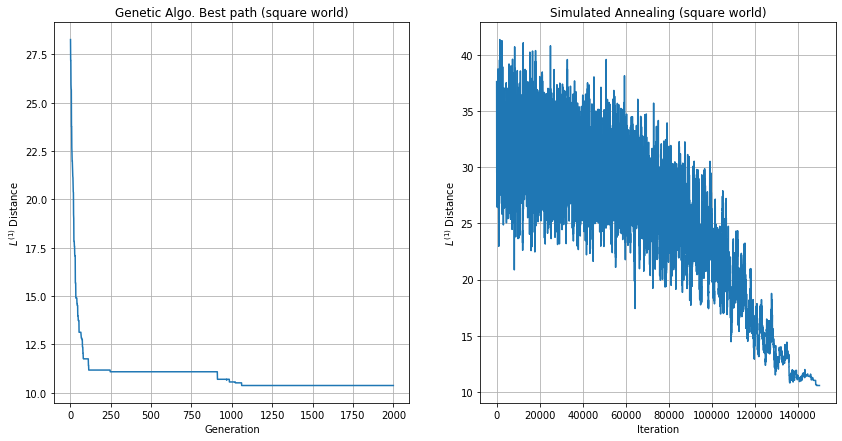

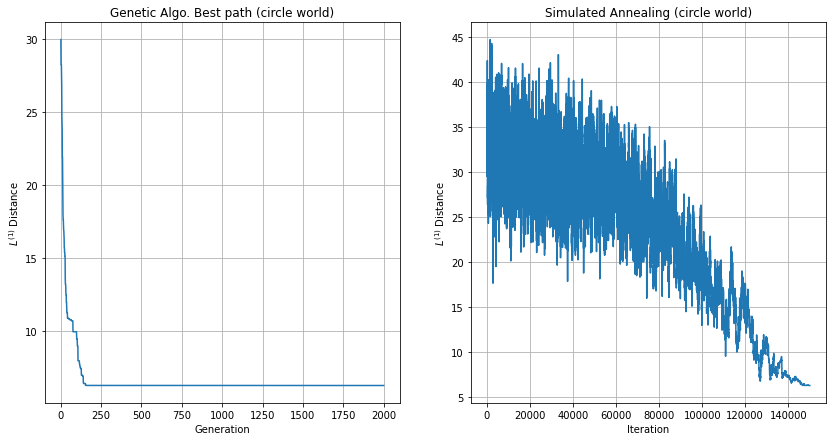

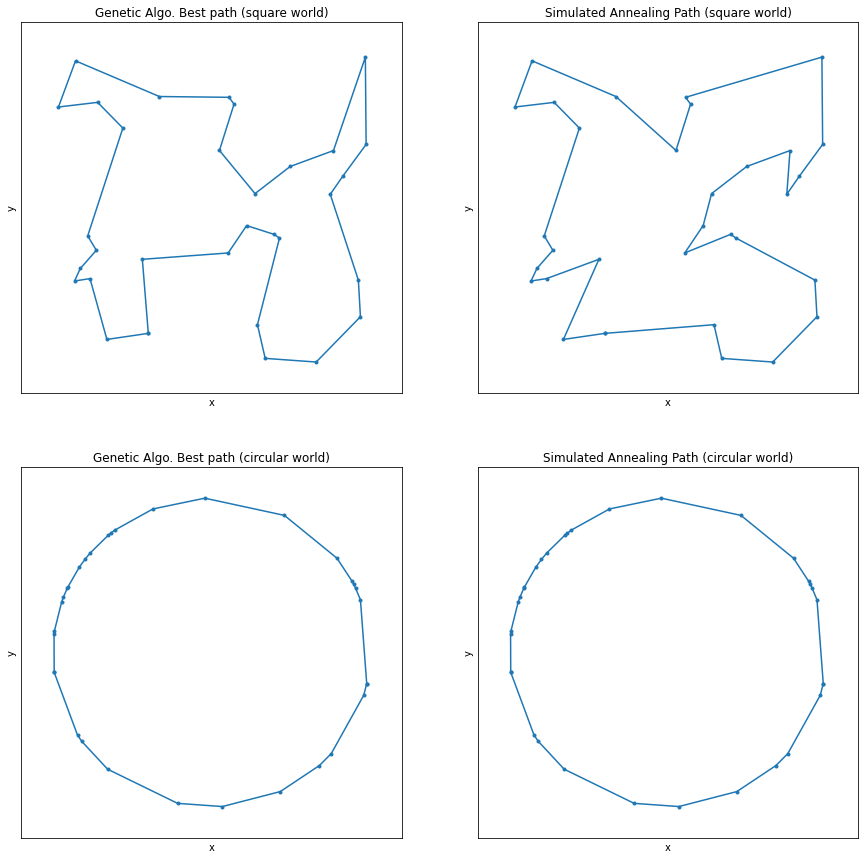

In [21]:
# Load data square world (SA)
x_sq_distance, y_sq_distance = np.loadtxt("../results/exercise_10.1/square/path_distance.dat", unpack = True, usecols=(0,2))
x_sq_path, y_sq_path = np.loadtxt("../results/exercise_10.1/square/path.dat", unpack = True)
# Load data circle world (SA)
x_circ_distance, y_circ_distance = np.loadtxt("../results/exercise_10.1/circle/path_distance.dat", unpack = True, usecols=(0,2))
x_circ_path, y_circ_path = np.loadtxt("../results/exercise_10.1/circle/path.dat", unpack = True)
# Load data square world (GA)
x_sq_best, y_sq_best = np.loadtxt("../../NSL-09/results/square/distance_of_best_path.dat", unpack = True)
x_sq_path_GA, y_sq_path_GA = np.loadtxt("../../NSL-09/results/square/best_path.dat", unpack = True)
# Load data circle world (GA)
x_circ_best, y_circ_best = np.loadtxt("../../NSL-09/results/circle/distance_of_best_path.dat", unpack = True)
x_circ_path_GA, y_circ_path_GA = np.loadtxt("../../NSL-09/results/circle/best_path.dat", unpack = True)


# Plot L1 distance (square world)
plt.figure(1, figsize = (14, 7))
# Genetic Algo
plt.subplot(1, 2, 1)
plt.title("Genetic Algo. Best path (square world)")
plt.plot(x_sq_best, y_sq_best)
plt.xlabel('Generation')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)
# Simulated Annealing
plt.subplot(1, 2, 2)
plt.title("Simulated Annealing (square world)")
plt.plot(x_sq_distance, y_sq_distance)
plt.xlabel('Iteration')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)

# Plot L1 distance (circle world)
plt.figure(2, figsize = (14, 7))
# Genetic Algo
plt.subplot(1, 2, 1)
plt.title("Genetic Algo. Best path (circle world)")
plt.plot(x_circ_best, y_circ_best)
plt.xlabel('Generation')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)
# Simulated Annealing
plt.subplot(1, 2, 2)
plt.title("Simulated Annealing (circle world)")
plt.plot(x_circ_distance, y_circ_distance)
plt.xlabel('Iteration')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)

# Plot path 
plt.figure(3, figsize = (15, 15))
# Square world
# Genetic Algo
plt.subplot(2, 2, 1)
plt.title("Genetic Algo. Best path (square world)")
plt.plot(x_sq_path_GA, y_sq_path_GA,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])
# Simulated Annealing
plt.subplot(2, 2, 2)
plt.title("Simulated Annealing Path (square world)")
plt.plot(x_sq_path, y_sq_path,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])
# Circle world
# Genetic Algo
plt.subplot(2, 2, 3)
plt.title("Genetic Algo. Best path (circular world)")
plt.plot(x_circ_path_GA, y_circ_path_GA,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])
# Simulated Annealing
plt.subplot(2, 2, 4) 
plt.title("Simulated Annealing Path (circular world)")
plt.plot(x_circ_path, y_circ_path,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])

plt.show()

In [20]:
print("Final value of L1 distance reached by the Genetic Algo. (square world) = ", y_sq_best[len(y_sq_best)-1])
print("Final value of L1 distance reached by the Simulated Annealing procedure (square world) = ", y_sq_distance[len(y_sq_distance)-1])
print("Final value of L1 distance reached by the Genetic Algo. (circle world) = ", y_circ_best[len(y_circ_best)-1])
print("Final value of L1 distance reached by the Simulated Annealing procedure (circle world) = ", y_circ_distance[len(y_circ_distance)-1])

Final value of L1 distance reached by the Genetic Algo. (square world) =  10.3774
Final value of L1 distance reached by the Simulated Annealing procedure (square world) =  10.5669
Final value of L1 distance reached by the Genetic Algo. (circle world) =  6.24595
Final value of L1 distance reached by the Simulated Annealing procedure (circle world) =  6.24595


### Exercise 10.2

For this exercise I've parallelized with MPI libraries the Genetic Algorithm code written for the 9th laboratory.
In order to solve the TSP I've performed a *Genetic Search* with 4 *parallel GA searches of the optimal path*.
Each node performed an independent GA search (the so-called *Continents*) and for $N_{migr}=100$ times *Continents* exchanges their best individuals randomly.

I've applied this code to the TSP for the same 32 cities randomly placed inside a square of the previous exercises. 

To estimate if the performances of the single Genetic Search performed by each node has improved with *Continents*, I compare the L1 distance of the best path versus the number of generation of each node to see if the algorithm converge faster to the final result compared with the non-parallel code of the 9th laboratory.

Results are shown below.

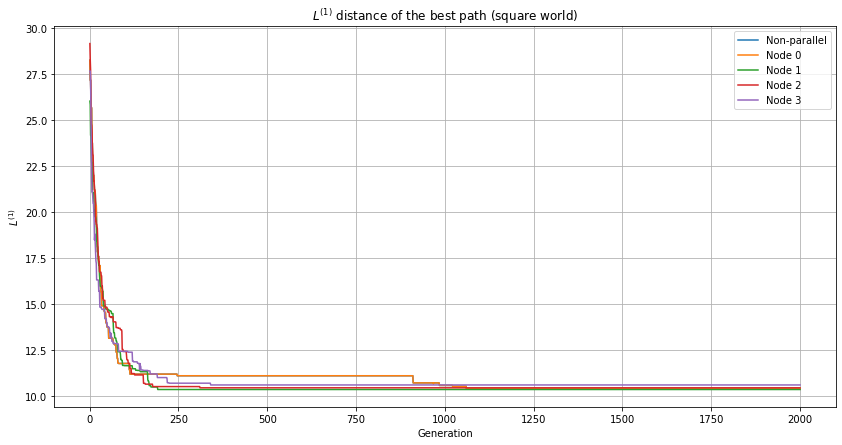

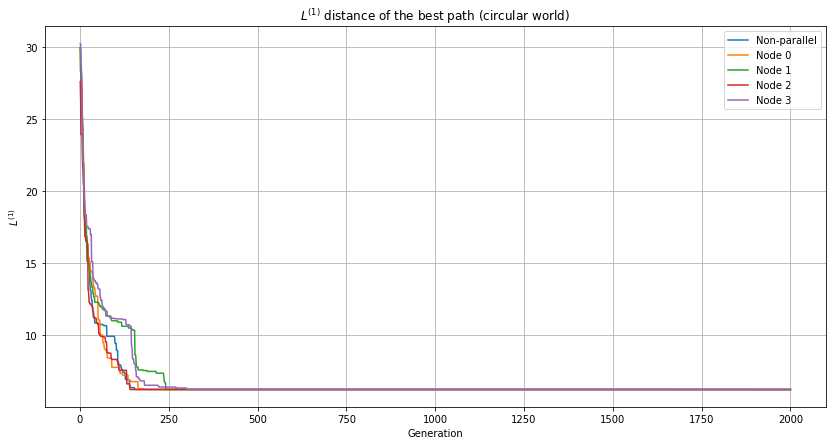

In [28]:
x_sq_0, y_sq_0 = np.loadtxt("../results/exercise_10.2/square/distance_of_best_path_node0.dat", unpack = True)
x_sq_1, y_sq_1 = np.loadtxt("../results/exercise_10.2/square/distance_of_best_path_node1.dat", unpack = True)
x_sq_2, y_sq_2 = np.loadtxt("../results/exercise_10.2/square/distance_of_best_path_node2.dat", unpack = True)
x_sq_3, y_sq_3 = np.loadtxt("../results/exercise_10.2/square/distance_of_best_path_node3.dat", unpack = True)
#x_sq_non, y_sq_path_mpi = np.loadtxt("../results/exercise_10.2/square/distance_of_best_path_node0.dat", unpack = True)

x_circ_0, y_circ_0 = np.loadtxt("../results/exercise_10.2/circle/distance_of_best_path_node0.dat", unpack = True)
x_circ_1, y_circ_1 = np.loadtxt("../results/exercise_10.2/circle/distance_of_best_path_node1.dat", unpack = True)
x_circ_2, y_circ_2 = np.loadtxt("../results/exercise_10.2/circle/distance_of_best_path_node2.dat", unpack = True)
x_circ_3, y_circ_3 = np.loadtxt("../results/exercise_10.2/circle/distance_of_best_path_node3.dat", unpack = True)
#x_circ_path_mpi, y_circ_path_mpi = np.loadtxt("Exercise_02/data/circle/best_path.dat", unpack = True)

plt.figure(1, figsize = (14, 7))
plt.title("$L^{(1)}$ distance of the best path (square world)")
plt.plot(x_sq_best, y_sq_best, label="Non-parallel")
plt.plot(x_sq_0, y_sq_0, label="Node 0")
plt.plot(x_sq_1, y_sq_1, label="Node 1")
plt.plot(x_sq_2, y_sq_2, label="Node 2")
plt.plot(x_sq_3, y_sq_3, label="Node 3")
plt.xlabel('Generation')
plt.ylabel('$L^{(1)}$')
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (14, 7))
plt.title("$L^{(1)}$ distance of the best path (circular world)")
plt.plot(x_circ_best, y_circ_best, label="Non-parallel")
plt.plot(x_circ_0, y_circ_0, label="Node 0")
plt.plot(x_circ_1, y_circ_1, label="Node 1")
plt.plot(x_circ_2, y_circ_2, label="Node 2")
plt.plot(x_circ_3, y_circ_3, label="Node 3")
plt.xlabel('Generation')
plt.ylabel('$L^{(1)}$')
plt.grid(True)
plt.legend()

plt.show()